In [71]:
import ast
import math
import pandas as pd
import glob
import numpy as np
import cv2


import matplotlib.pyplot as plt
import matplotlib.style as style
%cd ../dataset/new/train_simplified

[Errno 2] No such file or directory: '../dataset/new/train_simplified'
/home/codex/SKILLS/DS&ML/project/dataset/new/train_simplified


In [38]:
all_files = glob.glob('*.csv')
train = pd.DataFrame()

#Read 4 classes
count=0
for csv in all_files:
    if count==4:
        break
    data = pd.read_csv(csv,index_col='key_id',nrows=6)
#     data['word'] = data['word'].replace
    train = train.append(data)
    count+=1

train.head(10)

/tmp/ipykernel_17310/4131825012.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(data)
/tmp/ipykernel_17310/4131825012.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(data)
/tmp/ipykernel_17310/4131825012.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(data)
/tmp/ipykernel_17310/4131825012.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(data)


,countrycode,drawing,recognized,timestamp,word
key_id,,,,,
6560118760013824,US,"[[[41, 41, 16, 9, 0, 0, 3], [47, 65, 88, 105, ...",False,2017-03-01 07:03:46.114600,bottlecap
5328341601091584,BE,"[[[159, 109, 68, 47, 35, 29, 29, 40, 74, 95, 1...",True,2017-03-03 18:41:05.090470,bottlecap
6181565275045888,US,"[[[183, 179, 168, 141, 77, 57, 24, 22, 28, 64,...",True,2017-03-06 19:07:59.203870,bottlecap
6080619991793664,AT,"[[[2, 0, 3, 18, 52, 72, 102, 131, 157, 175, 17...",True,2017-01-27 20:20:26.592430,bottlecap
4773378307129344,US,"[[[133, 86, 55, 31, 0, 32, 63, 154, 178, 239, ...",True,2017-03-15 23:36:38.053680,bottlecap
5487319815553024,GB,"[[[50, 164, 240, 251, 249, 238, 191, 112, 67, ...",True,2017-03-02 10:45:13.058140,bottlecap
5546137161302016,GB,"[[[28, 110, 126, 106, 59, 37, 32, 25], [168, 1...",True,2017-03-29 12:39:34.815400,house plant
6020882763874304,GB,"[[[60, 60, 62, 69, 98, 116, 169, 171, 157, 152...",True,2017-03-03 12:09:53.163390,house plant
6036071685029888,US,"[[[2, 9, 14, 31, 37], [138, 144, 156, 216, 255...",True,2017-01-24 13:31:15.350690,house plant


In [39]:
words = train['word'].tolist()
drawings = [ast.literal_eval(pts) for pts in train[0:10]['drawing'].values]

# i- Plotting doodle images

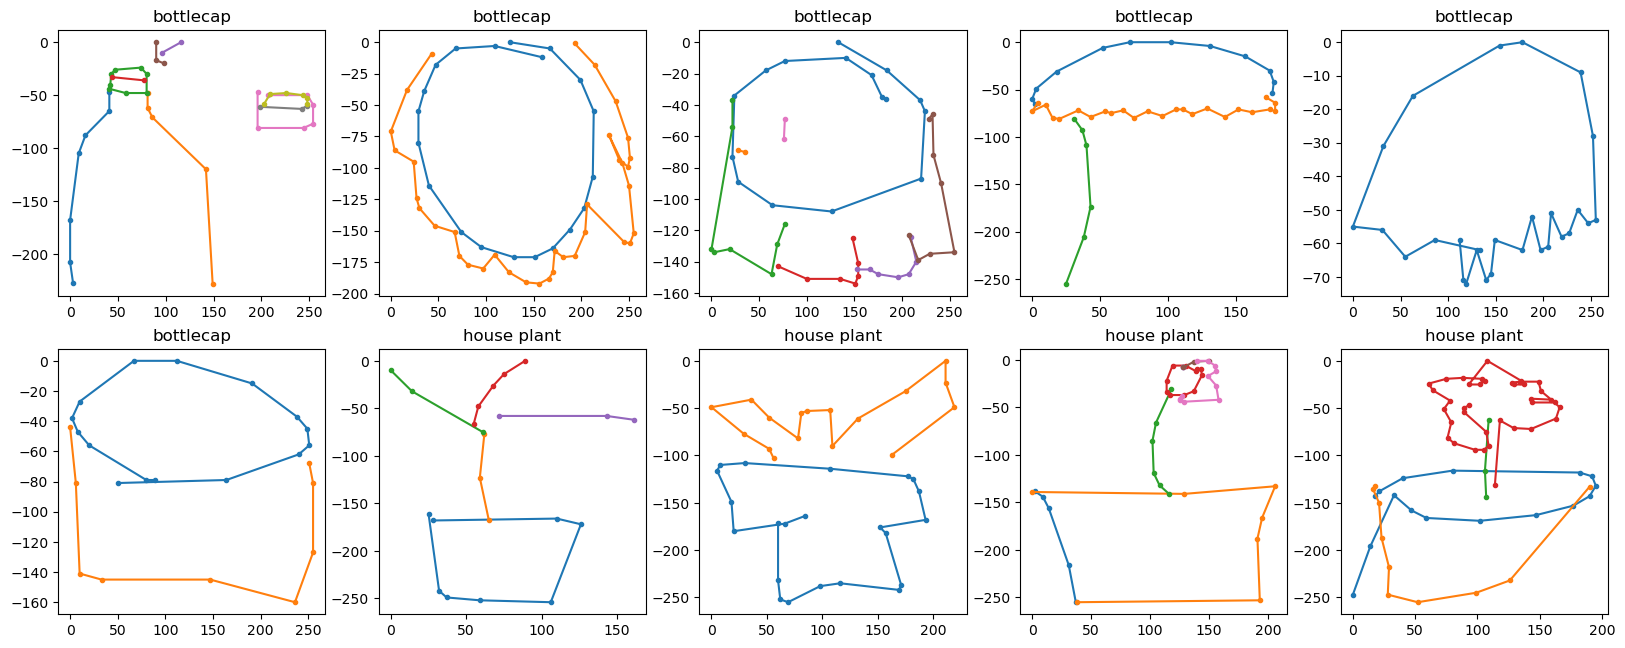

In [40]:
plt.figure(figsize=(20,20))
for i, drawing in enumerate(drawings):
    plt.subplot(5,5,i+1)
    for x,y in drawing:
        plt.plot(x,-1*np.array(y),marker='.')
        plt.title(words[i])
        


# ii - reshaping each image to dimension (64*64)

In [42]:
size=64
Base_Size=256
def df_to_image_array(df, size=size, lw=6):
    df['drawing'] = [ast.literal_eval(pts) for pts in df[0:]['drawing'].values]
    x = np.zeros((len(df), size, size))
    
    df['drawing'] = df['drawing'].apply(draw_cv2)
    x = np.vstack([a for a in df['drawing']]).reshape((len(df),size,size,1))
#     x = np.vstack([a for a in df['drawing']])
    return x

In [43]:
#Test
def draw_cv2(raw_strokes, size=size, lw=6):
    img = np.zeros((Base_Size, Base_Size))
    for stroke in raw_strokes:
        for i in range(len(stroke[0]) - 1):
            img = cv2.line(img, (stroke[0][i], stroke[1][i]), (stroke[0][i + 1], stroke[1][i + 1]), 255, lw)
    return (cv2.resize(img, (size, size))/ 255.)

In [44]:
images = df_to_image_array(train)

## plotting resphaped images

In [45]:


def plot_samples(images,rows=1,cols=5,title=''):
    fig,ax=plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)
    
    for i in list(range(0,min(len(images),(rows*cols)))):
        a=fig.add_subplot(rows,cols,i+1)
        imgplot=plt.imshow(images[i],cmap='gray_r',interpolation='nearest')
        plt.xticks([])
        plt.yticks([])
     

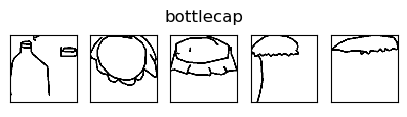

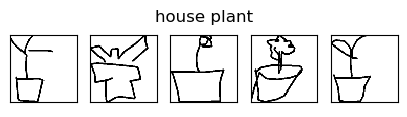

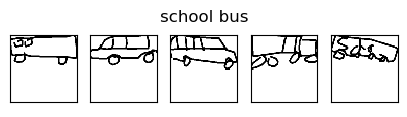

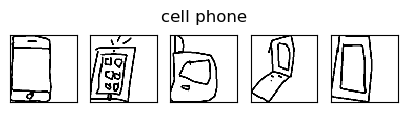

In [46]:
for i in range(0, len(images),6):
    plot_samples(images[i:i+6],title=words[i])
    